In [2]:
%matplotlib inline
import re

import numpy as np
import pandas as pd
import seaborn as sns
tips = sns.load_dataset("tips")

import ggplot as gp
import matplotlib.pyplot as plt

import vcf

In [3]:
# set figure characteristics

# size
sns.set_context("poster")

# Grid style
sns.set_style("whitegrid")

# colors
sns.set_palette(sns.hls_palette(n_colors=5, h=0.59, l=0.4, s=0.75))

ggplot_theme = gp.theme_seaborn(context='notebook')


In [4]:
# Paths
vcf_path = "/home/gus/remote_mounts/louise/data/genomes/glossina_fuscipes/annotations/SNPs/tsetseFINAL_14Oct2014_f2_53.recode.renamed_scaffolds.maf0_05.recode.vcf"

pcadapt_dir = "/home/gus/remote_mounts/louise/data/genomes/glossina_fuscipes/annotations/SNPs/pcadapt_4pops"


In [5]:
def gather(df, key, value, cols):
    id_vars = [col for col in df.columns if col not in cols]
    id_values = cols
    var_name = key
    value_name = value
    return pd.melt(df, id_vars, id_values, var_name, value_name)

def recode_column(column_name):
    
    if isinstance(column_name,int):
        i = column_name + 1
        return "Factor {i}".format(i=i)
    
    if column_name.upper() == "INDEX":
        return "sample"
    
def load_scores(pcadapt_scores_path, vcf_path):
    vcf_reader = vcf.Reader(open(vcf_path, 'r'))
    indiv_names = vcf_reader.samples
    
    df = pd.read_table(filepath_or_buffer=pcadapt_scores_path, sep='\s', 
                                             header=None, names=indiv_names,
                                             engine='python').T.reset_index()
    df = df.rename(columns=recode_column)
    
    return df

def load_main(pcadapt_path):
    
    return pd.read_table(filepath_or_buffer=pcadapt_path, sep='\t', engine='python').dropna(axis=1)

In [6]:
# load files
PCAdapt_s1000_b500_k2_scores = load_scores(pcadapt_scores_path=pcadapt_dir+"/PCAdapt_4pops_s1000_b500_k2.scores",
                                           vcf_path=vcf_path)

In [7]:
PCAdapt_s1000_b500_k2 = load_main(pcadapt_path=pcadapt_dir+"/PCAdapt_4pops_s1000_b500_k2")

# Plotting functions

In [8]:
# set labels

def set_site_names(df):
    re_site = re.compile('\A\D{,3}')
    df["site"] = df['sample'].apply(lambda indiv: re_site.findall(indiv)[0])
    df.sort(columns='sample', inplace=True)
    df.reset_index(inplace=True)
    df["individuals"] = df.index.values + 1
    
    
    return df.drop(["index"], axis=1)
#     return df

# plot factors vs individuals

def plot_factors_v_indivs(df):
    
    plt.figure(figsize=(20, 6))
    f = sns.stripplot(x="Factor 2", y="Factor 1", hue="site", data=df, jitter=False, split=True)
#     f = plt.scatter(x=df["Factor 1"], y=df["Factor 2"], c=df["site"],cmap=sns.cmap)
    return f
    


In [9]:
my_plots = {}

In [10]:
PCAdapt_s1000_b500_k2_scores = set_site_names(PCAdapt_s1000_b500_k2_scores)

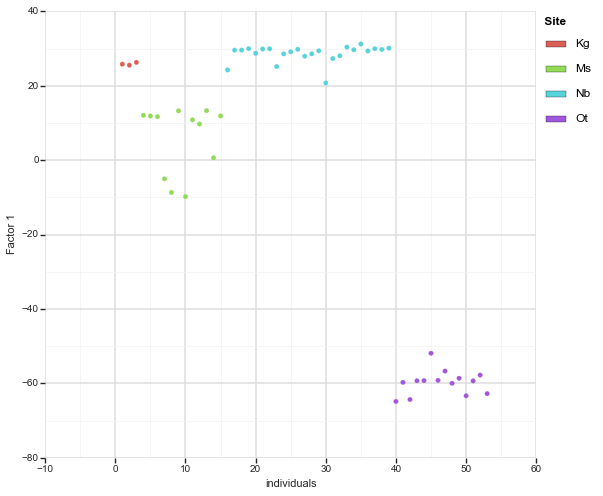

<ggplot: (8758374075121)>

In [11]:
gp_factor1 = gp.ggplot(PCAdapt_s1000_b500_k2_scores, gp.aes('individuals', 'Factor 1', color='site')) + gp.geom_point() + ggplot_theme
my_plots["gp_factor1"] = gp_factor1
gp_factor1

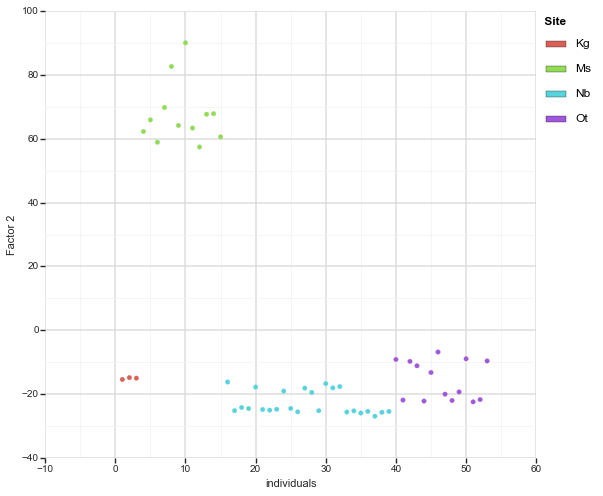

<ggplot: (8758327102617)>

In [12]:
gp_factor2 = gp.ggplot(PCAdapt_s1000_b500_k2_scores, gp.aes('individuals', 'Factor 2', color='site')) + gp.geom_point() + ggplot_theme
my_plots["gp_factor2"] = gp_factor2
gp_factor2

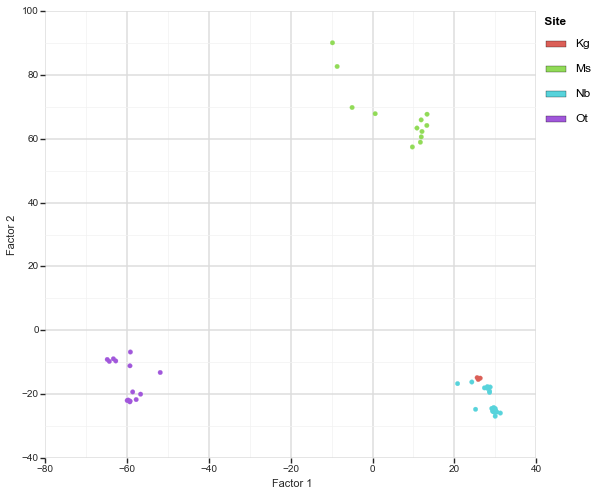

<ggplot: (8758327095597)>

In [13]:
# plt.figure(figsize=(12,12))
gp_factor1x2 = gp.ggplot(PCAdapt_s1000_b500_k2_scores, gp.aes('Factor 1', 'Factor 2', color='site')) 
gp_factor1x2 += gp.geom_point()
gp_factor1x2 += ggplot_theme
my_plots["gp_factor1x2"] = gp_factor1x2
gp_factor1x2

In [14]:
def get_factors_rename_map(df):    
    column_map = {}
    for k,v in zip(df.columns, list(np.arange(0,len(df.columns))+1)):
        column_map[k] = "Factor {v}".format(v=str(v))

    return column_map

def assign_factors_to_snps(df):
    factor_ps = df.iloc[:,2:]
    factor_name_map = get_factors_rename_map(factor_ps)
    factor_ps = factor_ps.rename(columns=factor_name_map)
    
    factor_id = factor_ps.apply(lambda x: x.argmax(), axis = 1)
    
    df['Factor'] = factor_id
    df.rename(columns=factor_name_map, inplace=True)
    
    return df

def add_snp_number(df):
    df["SNP"] = df.index +1
    return df

def plot_factor_SNPs(df):
    pass
    

In [15]:
PCAdapt_s1000_b500_k2.head()

,logBF,logPO,P(Z = 1|O),P(Z = 2|O)
0,-0.829485,-3.780870,0.805641,0.194359
1,-0.896247,-3.847633,0.784227,0.215773
2,-0.860594,-3.811980,0.798122,0.201878
3,-0.860596,-3.811981,0.798122,0.201878
4,-0.867761,-3.819146,0.796340,0.203660


In [16]:
PCAdapt_s1000_b500_k2_ = PCAdapt_s1000_b500_k2.copy()
PCAdapt_s1000_b500_k2_.head()

,logBF,logPO,P(Z = 1|O),P(Z = 2|O)
0,-0.829485,-3.780870,0.805641,0.194359
1,-0.896247,-3.847633,0.784227,0.215773
2,-0.860594,-3.811980,0.798122,0.201878
3,-0.860596,-3.811981,0.798122,0.201878
4,-0.867761,-3.819146,0.796340,0.203660


In [17]:
# pdb

In [18]:
f = assign_factors_to_snps(PCAdapt_s1000_b500_k2_)

In [19]:
f.head(18)

,logBF,logPO,Factor 1,Factor 2,Factor
0,-0.829485,-3.780870,0.805641,0.194359,Factor 1
1,-0.896247,-3.847633,0.784227,0.215773,Factor 1
2,-0.860594,-3.811980,0.798122,0.201878,Factor 1
3,-0.860596,-3.811981,0.798122,0.201878,Factor 1
4,-0.867761,-3.819146,0.796340,0.203660,Factor 1
5,-1.261743,-4.213129,0.510037,0.489963,Factor 1
6,-1.261743,-4.213129,0.510041,0.489959,Factor 1
7,-1.158710,-4.110096,0.605877,0.394123,Factor 1
8,-0.986982,-3.938368,0.734769,0.265231,Factor 1
9,-1.261746,-4.213131,0.510041,0.489959,Factor 1


In [20]:
f = add_snp_number(f)

In [21]:
f.head()

,logBF,logPO,Factor 1,Factor 2,Factor,SNP
0,-0.829485,-3.780870,0.805641,0.194359,Factor 1,1
1,-0.896247,-3.847633,0.784227,0.215773,Factor 1,2
2,-0.860594,-3.811980,0.798122,0.201878,Factor 1,3
3,-0.860596,-3.811981,0.798122,0.201878,Factor 1,4
4,-0.867761,-3.819146,0.796340,0.203660,Factor 1,5


In [22]:
f['Minor Support'] = 0
f['Substantial Support'] = 0.5

In [23]:
f.head()

,logBF,logPO,Factor 1,Factor 2,Factor,SNP,Minor Support,Substantial Support
0,-0.829485,-3.780870,0.805641,0.194359,Factor 1,1,0,0.5
1,-0.896247,-3.847633,0.784227,0.215773,Factor 1,2,0,0.5
2,-0.860594,-3.811980,0.798122,0.201878,Factor 1,3,0,0.5
3,-0.860596,-3.811981,0.798122,0.201878,Factor 1,4,0,0.5
4,-0.867761,-3.819146,0.796340,0.203660,Factor 1,5,0,0.5


In [24]:
zones = pd.DataFrame(data={'LineKind':["Min","Max"],
                           'x':[0,0.5],
                           'y':[75000,75000]
                          })

In [25]:
zones.head()

,LineKind,x,y
0,Min,0.0,75000
1,Max,0.5,75000


In [26]:
gp.__repr__??

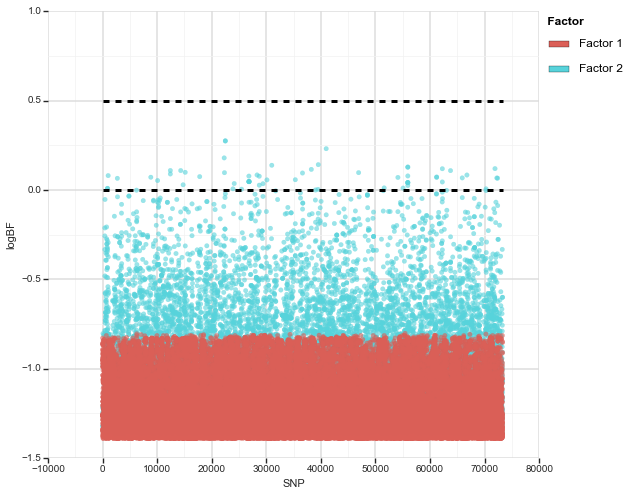

In [27]:
gp_local_adapt = gp.ggplot(f, gp.aes('SNP', 'logBF', color='Factor', xmin=0, xmax=len(f)))
gp_local_adapt += gp.geom_point(alpha=0.6)
gp_local_adapt += gp.geom_hline(yintercept=[0,0.5], show_guide=True, color='k', linetype='--', size=3)
# gp_local_adapt += gp.geom_text(gp.aes(x="x", y="y", label="LineKind"),data=zones)
gp_local_adapt += gp.theme_seaborn()
my_plots["gp_local_adapt"] = gp_local_adapt

gp_local_adapt.draw()

In [28]:
# gp_local_adapt = gp.ggplot(f, gp.aes('SNP', 'logBF', color='Factor')) + gp.scale_color_brewer(type='qual',palette=3)
# gp_local_adapt += gp.geom_point(alpha=0.6)
# # gp_local_adapt += gp.geom_line(gp.aes('SNP', 'Minor'),linetype='--') 
# gp_local_adapt += gp.geom_hline(gp.aes(y="Minor"), show_guide=True, data=f)
# # gp_local_adapt += gp.geom_hline(yintercept=[f.logBF.quantile(q=0.95)], color='k',size=3,xmin=0,xmax=len(f),linetype='--')
# # gp_local_adapt += gp.geom_area(ymin=0, ymax=0.5, alpha=0.1, fill=None)
# # gp_local_adapt += gp.geom_area(ymin=0.5, ymax=1, alpha=0.1, fill=None)
# gp_local_adapt += gp.theme_seaborn()
# # gp_local_adapt.add_to_legend(legend_type=, legend_dict, scale_type=u'discrete')
# gp_local_adapt

In [29]:
# gp_local_adapt.legend = new_l

In [30]:
# gp_local_adapt.legend

In [31]:
# old_l = gp_local_adapt.legend
# old_l

In [32]:
# new_l = {
# u'color': {u'column_name': 'Factor',
#             u'dict': {'#B3CDE3': 'Factor 2', '#FBB4AE': 'Factor 1'},
#             u'scale_type': u'discrete'},
# u'linestyle': {u'column_name': 'Thresholds',
#                 u'dict': {'#AFDE8D': 'Worth a Mention', 
#                           '#FBB4AE': 'Strong Support',
#                           '--':'Worth a Mention',
#                          },
#                 u'scale_type': u'discrete'}}
# new_l

In [33]:
# gp_local_adapt.legend = new_l
# gp_local_adapt.draw??

In [34]:
# {u'color': {u'column_name': 'Factor',
#             u'dict': {'#B3CDE3': 'Factor 2', '#FBB4AE': 'Factor 1'},
#             u'scale_type': u'discrete'}}